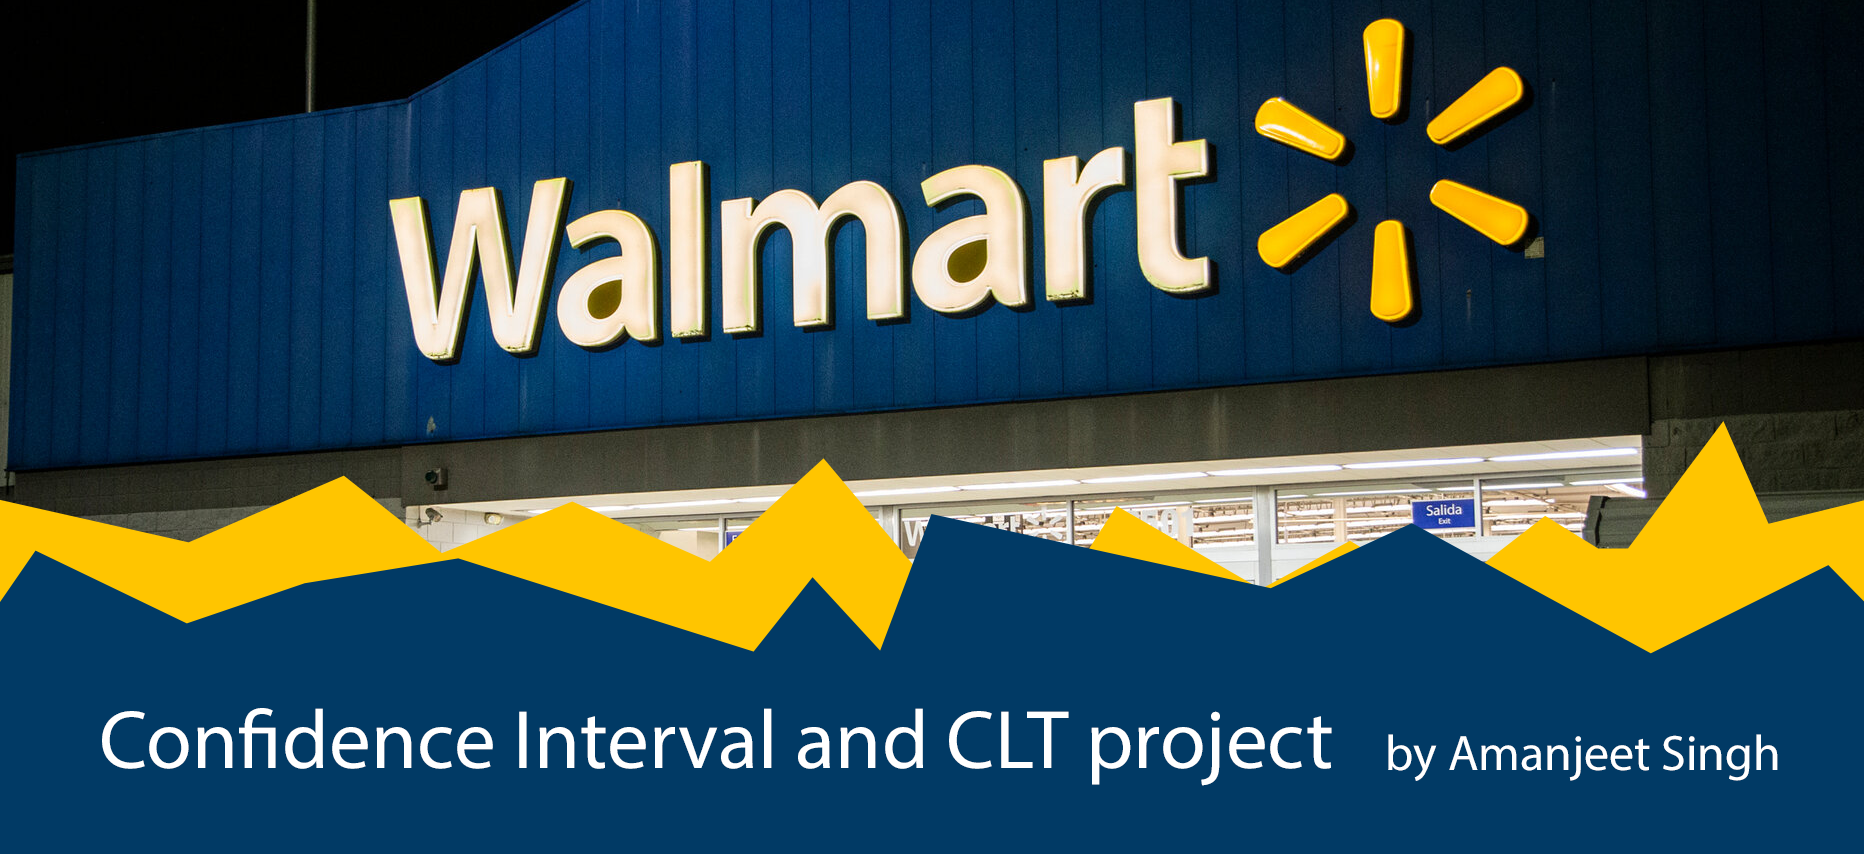

### Walmart Case Study - Confidence Interval and CLT

### Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv("walmart_data.csv")

In [3]:
# Dataset overview

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Analyzing basic metrics

#### Shape of data

In [4]:
df.shape

(550068, 10)

#### Data types of all the attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# Converting data type from integer to objects wherever appropriate

columns = ['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[columns] = df[columns].astype('object')

In [7]:
# Checking the data type of the converted columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


#### Statistical summary

In [8]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,5891.0,1001680.0,1026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,21.0,4.0,72308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,2.0,0.0,324731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,550068.0,20.0,5.0,150933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#### Observations:

- There are **5891** unique users and user ID **1001680** has the highest count.
- The customers belongs to **21** distinct occupation for the purchases with **Occupation 4** being the highest.
- In terms of marital status, **unmarried people** contribute more in terms of count of purchase.
- There are **20** unique product categories with **5** being the highest.

### Missing Values and Outlier Detection

In [10]:
# Null values detection

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [11]:
# Duplicate values detection

df.duplicated().sum()

0

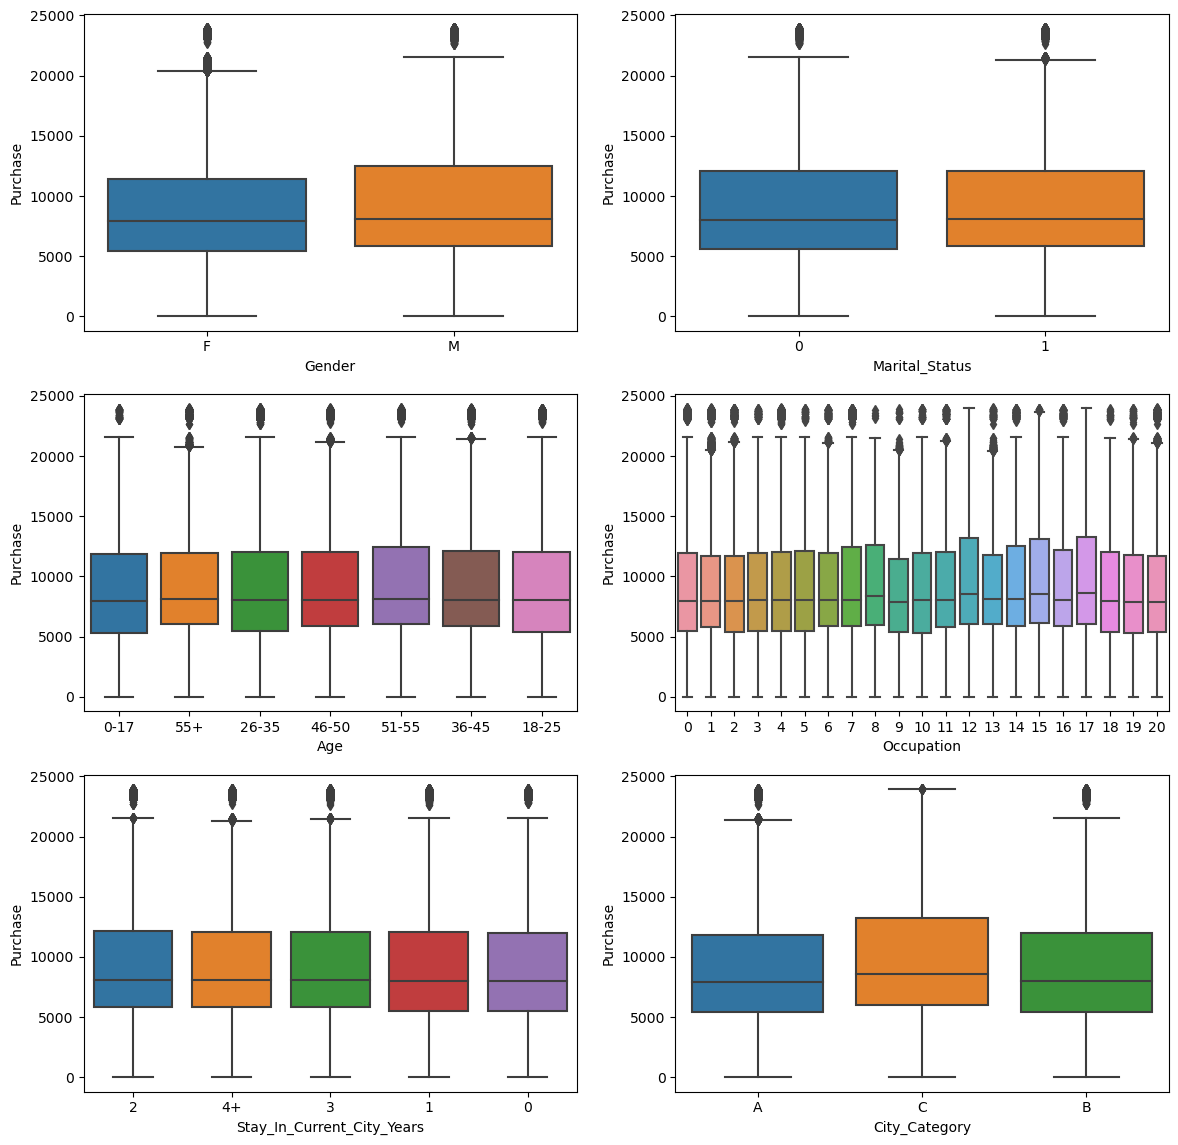

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
sns.boxplot(data = df, x = "Gender", y = "Purchase", ax=axs[0,0])
sns.boxplot(data = df, y = 'Purchase', x = 'Marital_Status', ax=axs[0,1])
sns.boxplot(data = df, y = 'Purchase', x = 'Age', ax=axs[1,0])
sns.boxplot(data = df, y = 'Purchase', x = 'Occupation', ax=axs[1,1])
sns.boxplot(data = df, y = 'Purchase', x = 'Stay_In_Current_City_Years', ax=axs[2,0])
sns.boxplot(data = df, y = 'Purchase', x = 'City_Category', ax=axs[2,1])
plt.show()

### Non-Graphical Analysis: Value counts and Unique attributes

In [13]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

#### Observations:

- There are transactions of **5891** users in this dataset.
- **3631** type of products are on sale on the black friday.
- There are a total of **7** age groups.
- The customers are distributed among **21** types of occupation.
- Customers are from **3** categories of city.
- Customer's years of stay in their respective city is divided into **5** categories.
- Range of products is divided into **20** categories.


In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [15]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [17]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [18]:
# Checking how categorical variables contributes to the entire data

col_category = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
(df[col_category].melt().groupby(['variable', 'value'])[['value']].count()/len(df))*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

#### Observations:

- About **40%** of the purchases are done by the age group **26-35**, **18%** by the age group **18-45**, **20%** by the age group **36-45**, also being the **top 3** contributing age groups
- About **75%** of the purchases are done by the **Male** customers and about **25%** by the **Female** customers
- About **59% Single** and **41% Married** customers contribute to the total purchases
- **13.5%** of the customers are staying in the city or less than a year, **35%** for **1 year**, **18%** for **2 years**, **17%** for **3 years** and **15%** for more than 4 years
- There are **20** product categories in total
- There are **20** different types of occupations in the city

### Age:

In [19]:
#Checking how the data is spread basis distinct users

df2 = df.groupby(['User_ID'])['Age'].unique()
df2.value_counts()

[26-35]    2053
[36-45]    1167
[18-25]    1069
[46-50]     531
[51-55]     481
[55+]       372
[0-17]      218
Name: Age, dtype: int64

In [20]:
(df2.value_counts()/len(df2))*100

[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: Age, dtype: float64

#### Observations:

- **35%** of the users are aged between **26 to 35**. 
- From the previous observation we saw **40%** of the purchase are done by users aged **26-35**. And, we have **35%** of the unique customers aged between **26-35** and they are contributing **40%** of total purchase count. So, we can infer users aged **26-35** are more frequent customers.

### City Category:

In [21]:
# Extracting 'User_ID' and 'City_Category' columns for further analysis

df_city = df[["User_ID", "City_Category"]]

In [22]:
# Number of unique user IDs in df_city dataframe

df_city["User_ID"].nunique()

5891

In [23]:
df_grouped = df_city.groupby(["User_ID", "City_Category"]).nunique().reset_index()

In [24]:
city_count = df_grouped["City_Category"].value_counts()
city_count

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

In [25]:
round((city_count/city_count.sum())*100,2)

C    53.28
B    28.98
A    17.74
Name: City_Category, dtype: float64

#### Observations:

- **53%** of the users belongs to city category **C** whereas, **29%** to category **B** and **18%** belong to category **A**. combining from the previous observation, category **B** purchase count is **42%** and category **C** purchase counts is **31%**.

- We can clearly see category **B** are more actively purchasing inspite of the fact they are only **29%** of the total users. On the other hand, we have **53%** of category **C** users but they only contribute **31%** of the total purchase count.

### Gender:

In [26]:
df_uni_cust = df.groupby(['Gender'])['User_ID'].nunique()
df_uni_cust

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [27]:
df_uni_cust / df_uni_cust.sum() * 100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

#### Observations:

- In terms of unique users, **28%** are **Female** and **72%** are **Male** as compared to the previous observation where **Female** users were **24.7%** and **Male** users were **75.3%**

### Marital Status:

In [28]:
df_uni_marital = df.groupby(['Marital_Status'])['User_ID'].nunique()
df_uni_marital

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [29]:
df_uni_marital / df_uni_marital.sum() * 100

Marital_Status
0    58.003735
1    41.996265
Name: User_ID, dtype: float64

#### Obeservations:
- We have **58%** of the **single users** and **42%** of **married users**. 
- Combining with previous observation, **59%** of the **single users** contribute more as compared to **41%** of the **married users**.

### Stayed in current city (in years)

In [30]:
df_city_unique = df.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()
df_city_unique

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [31]:
df_city_unique / df_city_unique.sum() * 100

Stay_In_Current_City_Years
0     13.104736
1     35.409947
2     19.436428
3     16.618571
4+    15.430317
Name: User_ID, dtype: float64

## Visual Analysis:

### Univariate Analysis

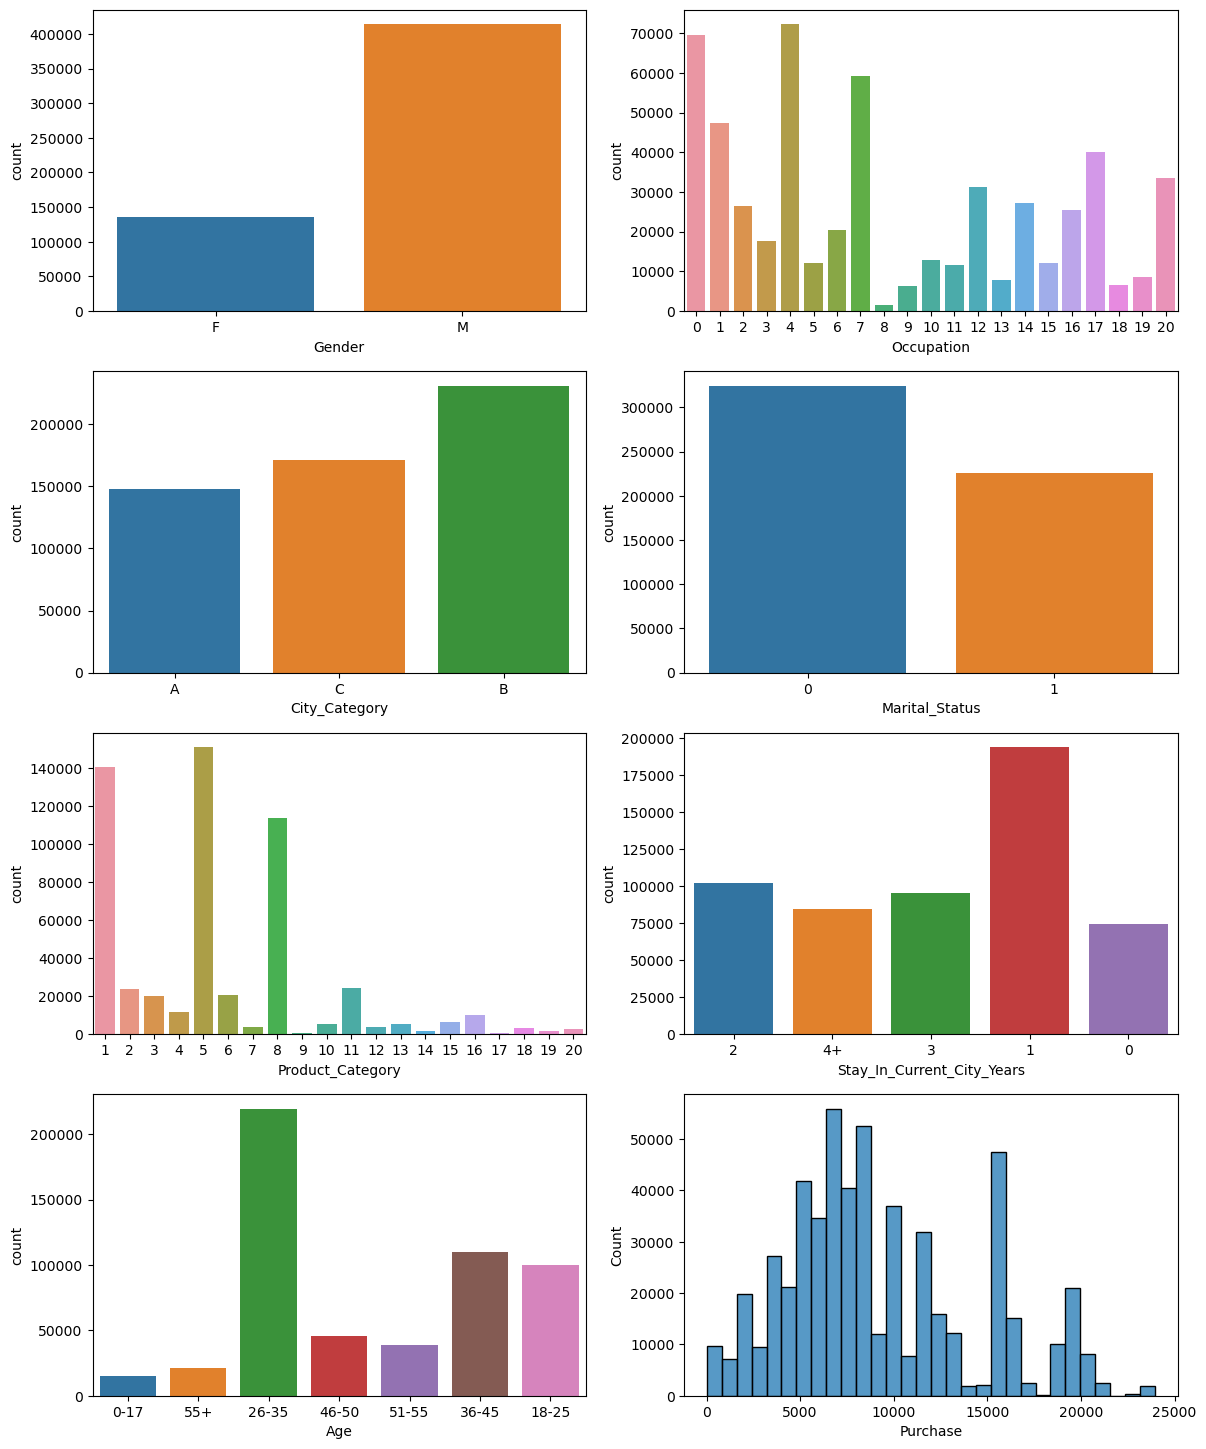

In [32]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
sns.countplot(data=df, x='Product_Category', ax=axs[2,0])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axs[2,1])
sns.countplot(data=df, x='Age', ax=axs[3,0])
sns.histplot(data=df, x='Purchase', bins= 30, ax=axs[3,1])
plt.show()

### Bivariate Analysis

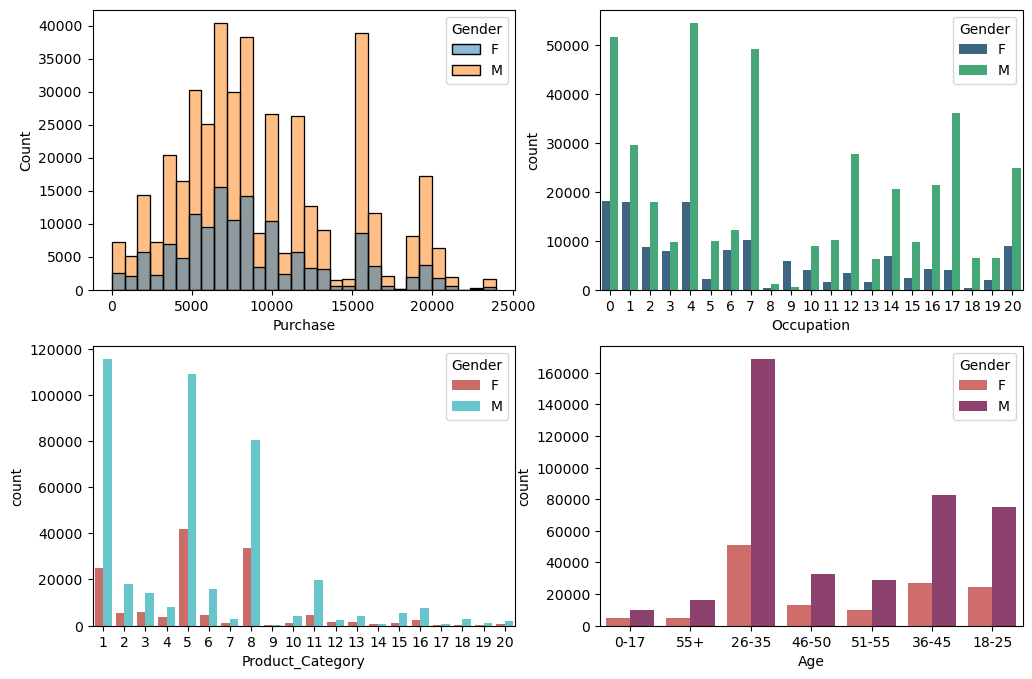

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x="Purchase", hue="Gender", bins =30, ax=axs[0,0])
sns.countplot(data=df, x = "Occupation", hue= "Gender", ax=axs[0,1],palette='viridis')
sns.countplot(data=df,x = "Product_Category",hue="Gender", ax=axs[1,0], palette = 'hls')
sns.countplot(data=df,x=df["Age"],hue=df["Gender"],ax=axs[1,1],palette='flare')
plt.show()

### Multivariate Analysis

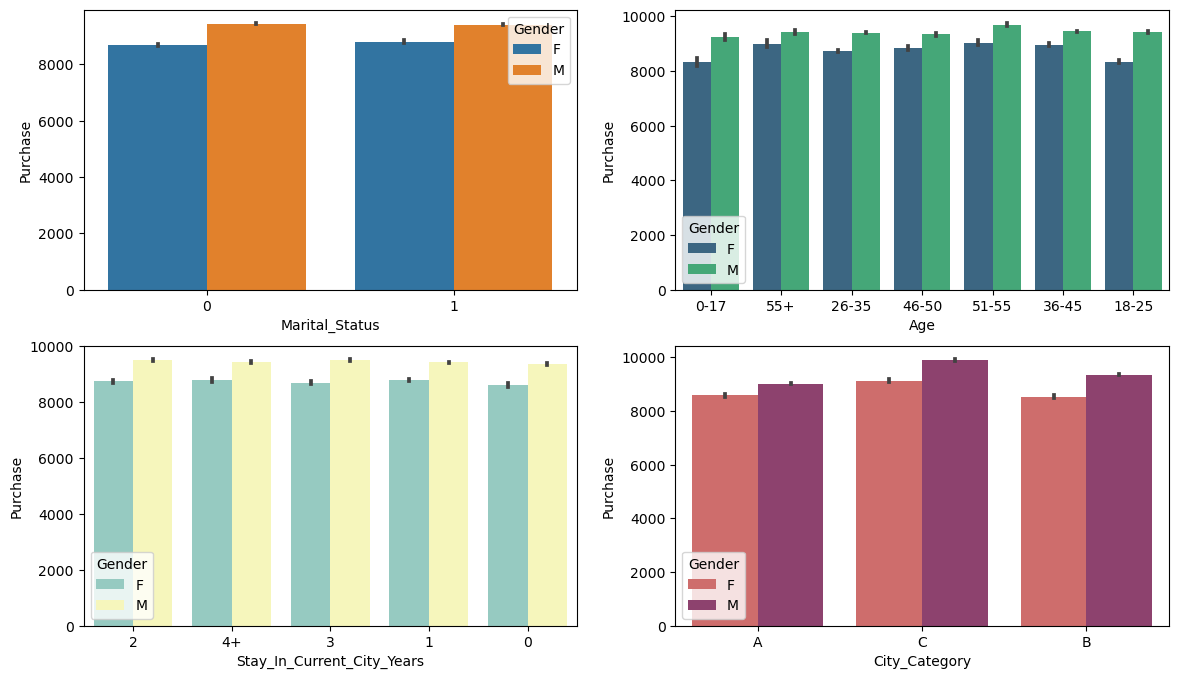

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.barplot(data = df, y = 'Purchase', x = 'Marital_Status', hue = "Gender", ax=axs[0,0])
sns.barplot(data = df, y = 'Purchase', x = 'Age', hue = "Gender", ax=axs[0,1], palette = 'viridis')
sns.barplot(data = df, y = 'Purchase', x = 'Stay_In_Current_City_Years', 
            hue = "Gender", ax=axs[1,0], palette = 'Set3')
sns.barplot(data = df, y = 'Purchase', x = 'City_Category', hue = "Gender", ax=axs[1,1], palette = 'flare')
plt.show()

In [35]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [36]:
df.groupby("Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [37]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


In [38]:
df.groupby("City_Category")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [39]:
df1 = df.copy()
df1 = df1[["Gender", "Age","City_Category","Marital_Status","Purchase"]]
df1["Gender"] = df["Gender"].astype("category").cat.codes
df1["Age"] = df["Age"].astype("category").cat.codes
df1["City_Category"] = df["City_Category"].astype("category").cat.codes
df1["Marital_Status"] = df["Marital_Status"].astype("category").cat.codes
df1.corr()

,Gender,Age,City_Category,Marital_Status,Purchase
Gender,1.000000,-0.004262,-0.004515,-0.011603,0.060346
Age,-0.004262,1.000000,0.123079,0.311738,0.015839
City_Category,-0.004515,0.123079,1.000000,0.039790,0.061914
Marital_Status,-0.011603,0.311738,0.039790,1.000000,-0.000463
Purchase,0.060346,0.015839,0.061914,-0.000463,1.000000


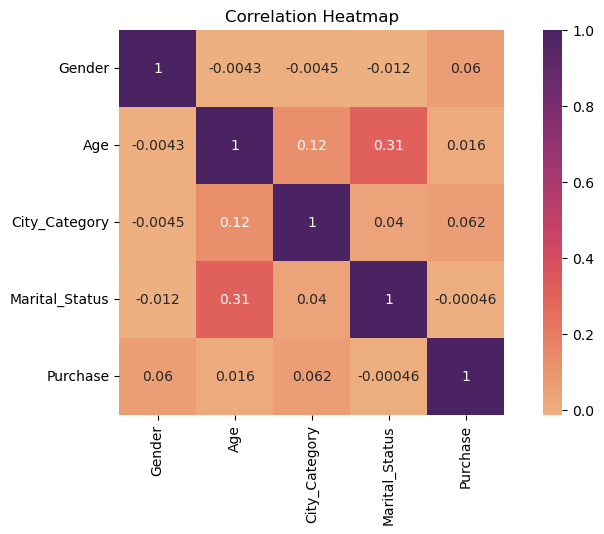

In [40]:
plt.figure(figsize = (10,5))
plt.title('Correlation Heatmap')
sns.heatmap(data = df1.corr(), annot = True, cmap = 'flare', square = True)
plt.show()

In [41]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


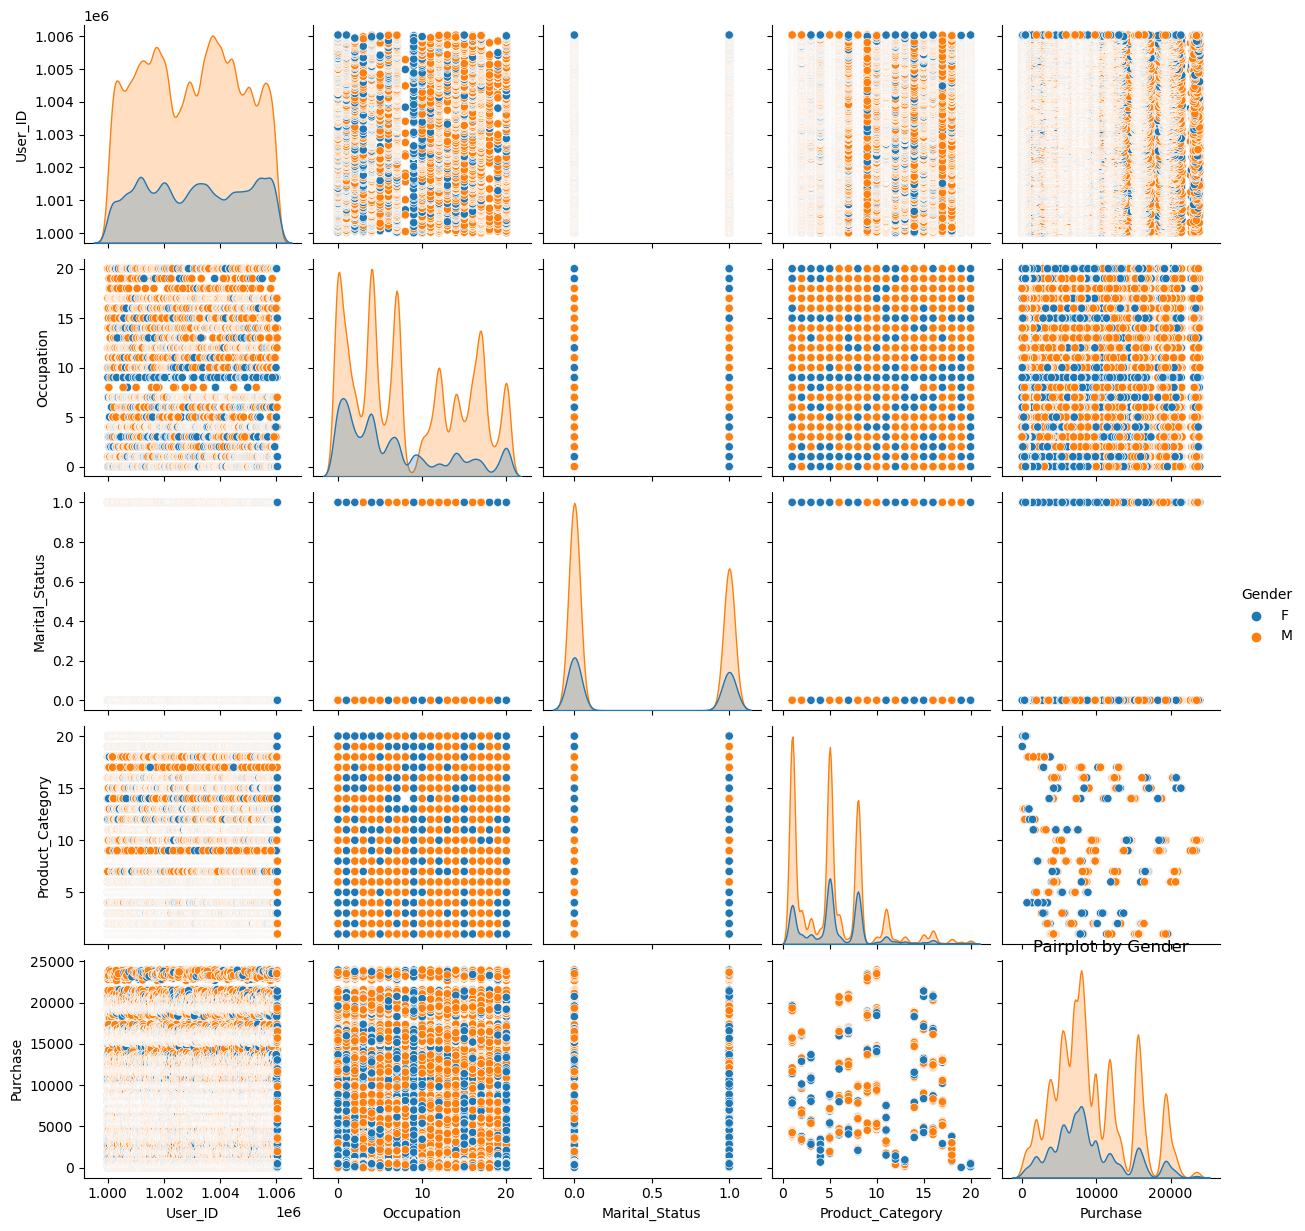

In [42]:
sns.pairplot(df, hue='Gender', diag_kind = 'kde')
plt.title('Pairplot by Gender')
plt.show()

### Questions

### 4.1 Are women spending more money per transaction than men? Why or Why not?

In [43]:
df.groupby(['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

As per the observation, average spending of women is **8734.56** while average spending of men is about **9437.52**. 

So we can conclude that **women are not spending more** than men.

### 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

### Taking a random sample of 1000

In [89]:
sample_df = df.sample(1000)

In [90]:
sample_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
484840,1002737,P00133742,M,26-35,3,B,3,0,5,5198
7308,1001147,P0097142,M,26-35,20,B,3,1,12,687
55000,1002426,P00177342,M,55+,0,C,1,1,8,8102
148271,1004878,P00120342,M,51-55,4,B,4+,1,5,3461
132744,1002440,P00262242,M,51-55,17,C,1,1,1,15773


In [91]:
sample_df.shape

(1000, 10)

In [92]:
sample_df = df.sample(1000)
sample_df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,281.0,9152.950178,4972.669065,36.0,5975.0,7997.0,11660.0,23341.0
M,719.0,9202.159944,5154.053617,60.0,5408.5,8048.0,11954.5,23938.0


In [93]:
sample_df = df.sample(1000)
sample_df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,250.0,8390.112000,4950.737537,14.0,5304.25,7547.0,10041.75,21276.0
M,750.0,9319.154667,5065.649721,24.0,5832.25,8008.0,11984.50,23752.0


In [49]:
# In order for these samples to be as close to actual population--> we will repeat this sampling 1000 times

In [94]:
# For male sample

sample_size = 1000
iterations = 1000

male_sample_df = [df[df["Gender"] == "M"].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [95]:
# For female sample

sample_size = 1000
iterations = 1000

female_sample_df = [df[df["Gender"] == "F"].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [96]:
np.mean(male_sample_df)

9441.500349999998

In [97]:
np.mean(female_sample_df)

8739.867568

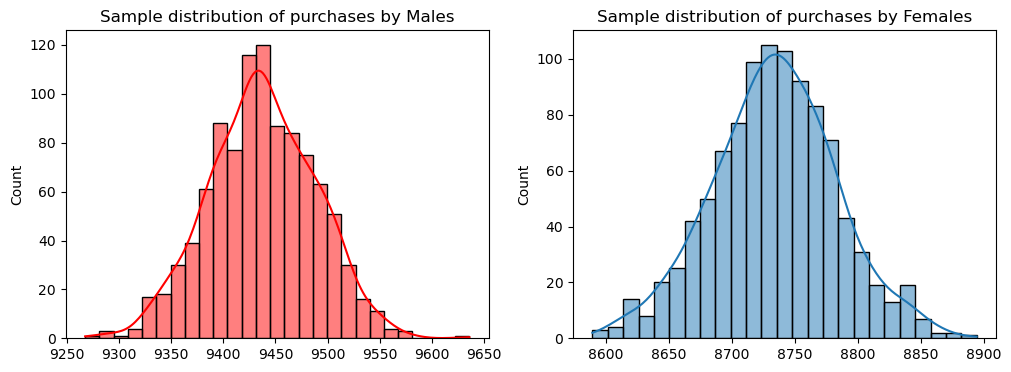

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1 = sns.histplot(male_sample_df, kde =True, ax= axs[0], color = 'r')
ax2 = sns.histplot(female_sample_df, kde = True, ax= axs[1])

ax1.title.set_text("Sample distribution of purchases by Males")
ax2.title.set_text("Sample distribution of purchases by Females")

plt.show()

### 99% Confidence Interval

In [109]:
male_confidence_interval = np.percentile(male_sample_df, [0.5 , 99.5])
male_confidence_interval

array([9046.922675, 9892.995595])

In [112]:
female_confidence_interval = np.percentile(female_sample_df, [0.5 , 99.5])
female_confidence_interval

array([8401.26719 , 9100.288685])

### Obersevations:

- Using CLT with **99%** CI, we found out that mean of **male** purchases lies between **9046.22 and 9893.0**.
- Using CLT with **99%** CI, we found out that mean of **female** purchases lies between **8401.26 and 9100.28**.
- There is an **overlap** in the ranges of the sample mean in **males and females**.

### 95% Confidence Interval

In [99]:
male_confidence_interval = np.percentile(male_sample_df, [2.5 , 97.5])
male_confidence_interval

array([9144.220375, 9752.168475])

In [100]:
female_confidence_interval = np.percentile(female_sample_df, [2.5 , 97.5])
female_confidence_interval

array([8446.675975, 9027.403   ])

### Obersevations:

- Using CLT with **95%** CI, we found out that mean of **male** purchases lies between **9144.22 and 9752.168**.
- Using CLT with **95%** CI, we found out that mean of **female** purchases lies between **8446.676 and 9027.4**.
- There is **no overlap** in the ranges of the sample mean in **males and females**.

### 90% Confidence Interval

In [101]:
male_confidence_interval = np.percentile(male_sample_df, [5 , 95])
male_confidence_interval

array([9186.6613, 9694.9124])

In [111]:
female_confidence_interval = np.percentile(female_sample_df, [5 , 95])
female_confidence_interval

array([8490.2661, 8993.5279])

### Obersevations:

- Using CLT with **90%** CI, we found out that mean of **male** purchases lies between **9186.6613 and 9694.9124**.
- Using CLT with **90%** CI, we found out that mean of **female** purchases lies between **8490.2661 and 8993.528**.
- There is **no overlap** in the ranges of the sample mean in **males and females**. 
- Hence, we can say that with **90% confidence**, mean of **male** purchases lies between **9186.6613 and 9694.9124** and the mean of **female** purchases lies between **8490.2661 and 8993.528**.

### Taking the sample size of 10000

In [118]:
sample_df = df.sample(10000)
sample_df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,2445.0,8833.860532,4805.164233,13.0,5441.0,7935.0,11427.0,23739.0
M,7555.0,9463.560159,5072.919073,12.0,5862.0,8113.0,12474.5,23958.0


In [119]:
# For male sample

sample_size = 10000
iterations = 1000

male_sample_df = [df[df["Gender"] == "M"].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [120]:
# For female sample

sample_size = 10000
iterations = 1000

female_sample_df = [df[df["Gender"] == "F"].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [121]:
np.mean(male_sample_df)

9437.4786729

In [122]:
np.mean(female_sample_df)

8733.734856699999

### 99% Confidence Interval

In [124]:
male_confidence_interval = np.percentile(male_sample_df, [0.5 , 99.5])
male_confidence_interval

array([9311.397207 , 9558.5957265])

In [125]:
female_confidence_interval = np.percentile(female_sample_df, [0.5 , 99.5])
female_confidence_interval

array([8607.4429355, 8856.7244255])

### Obersevations:

- Using CLT with **99%** CI, we found out that mean of **male** purchases lies between **9311.39 and 9558.6**.
- Using CLT with **99%** CI, we found out that mean of **female** purchases lies between **8607.44 and 8856.72**.
- There is an **no overlap** in the ranges of the sample mean in **males and females**.

### 95% Confidence Interval

In [126]:
male_confidence_interval = np.percentile(male_sample_df, [2.5 , 97.5])
male_confidence_interval

array([9335.0344425, 9535.778695 ])

In [127]:
female_confidence_interval = np.percentile(female_sample_df, [2.5 , 97.5])
female_confidence_interval

array([8635.6285025, 8836.292315 ])

### Obersevations:

- Using CLT with **99%** CI, we found out that mean of **male** purchases lies between **9335.03 and 9535.77**.
- Using CLT with **99%** CI, we found out that mean of **female** purchases lies between **8635.62 and 8836.29**.
- There is **no overlap** in the ranges of the sample mean in **males and females**.

### 90% Confidence Interval

In [128]:
male_confidence_interval = np.percentile(male_sample_df, [5 , 95])
male_confidence_interval

array([9351.66735, 9517.5538 ])

In [129]:
female_confidence_interval = np.percentile(female_sample_df, [5 , 95])
female_confidence_interval

array([8651.264695, 8816.64567 ])

### Obersevations:

- Using CLT with **99%** CI, we found out that mean of **male** purchases lies between **9351.66 and 9517.55**.
- Using CLT with **99%** CI, we found out that mean of **female** purchases lies between **8651.26 and 8816.64**.
- There is **no overlap** in the ranges of the sample mean in **males and females**.

### 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Upon increasing the sample size from **1000** samples to **10,000** we saw that there is **no overlap** in the Confidence Intervals of male and female spending.

Walmart can leverage this conclusion to make targeted changes and improvements to their business strategies by customising the products to Males & Females in the above respective confidence interval ranges.

### 4.4 Results when the same activity is performed for Married vs Unmarried

#### Taking a sample of 10000

In [134]:
sample_df = df.sample(10000)
sample_df.groupby("Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,5901.0,9248.301135,5049.230120,12.0,5474.0,8031.0,12090.0,23930.0
1,4099.0,9312.386192,5002.231894,12.0,5896.0,8082.0,12046.5,23960.0


In [137]:
# For unmarried sample

sample_size = 10000
iterations = 1000

unmarried_sample_df = [df[df["Marital_Status"] == 0].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [138]:
# For married sample

sample_size = 10000
iterations = 1000

married_sample_df = [df[df["Marital_Status"] == 1].sample(sample_size,
                replace = True)["Purchase"].mean()  for i in range(iterations)]

In [140]:
np.mean(unmarried_sample_df)

9266.432891900002

In [141]:
np.mean(married_sample_df)

9261.1743374

### 99% Confidence Interval

In [145]:
unmarried_confidence_interval = np.percentile(unmarried_sample_df, [0.5 , 99.5])
unmarried_confidence_interval

array([9139.3661445, 9394.7156405])

In [146]:
married_confidence_interval = np.percentile(married_sample_df, [0.5 , 99.5])
married_confidence_interval

array([9142.0574395, 9382.8899475])

### 95% Confidence Interval

In [147]:
unmarried_confidence_interval = np.percentile(unmarried_sample_df, [2.5 , 97.5])
unmarried_confidence_interval

array([9168.5450975, 9363.8994925])

In [148]:
married_confidence_interval = np.percentile(married_sample_df, [2.5 , 97.5])
married_confidence_interval

array([9164.943975 , 9356.4323525])

### 90% Confidence Interval

In [149]:
unmarried_confidence_interval = np.percentile(unmarried_sample_df, [5 , 95])
unmarried_confidence_interval

array([9184.35307 , 9348.737345])

In [150]:
married_confidence_interval = np.percentile(married_sample_df, [5 , 95])
married_confidence_interval

array([9182.786735, 9341.540095])

### Obeservations:
- **We can see that for all Confidence Intervals for sample size 10000, there is an overlap in the mean of purchases for Married vs Unmarried customers.**

### Results when the same activity is performed for Age

In [153]:
df1 = df.groupby('Age')['Purchase'].mean().reset_index(name = 'Avg Purchase')
df1

,Age,Avg Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


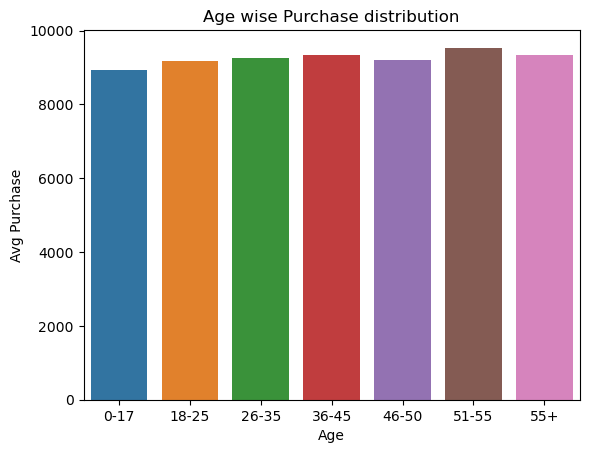

In [157]:
plt.title('Age wise Purchase distribution')
sns.barplot(data = df1,y = 'Avg Purchase', x = 'Age')
plt.show()

### Observation:
**We can infer that there is a marginal increase in average purchase amounts from the youngest age group (0-17) to the oldest age group (55+). This suggests that, on average, customers in higher age groups tend to make marginally larger purchases during Black Friday.**

### Final Insights

- The mean purchase amount for male customers was higher than that of female customers. This suggests that, on average, male customers spend more per transaction than female customers during Black Friday.

- Applying the CLT to compute confidence intervals further reinforced this observation.

- The confidence intervals for both male and female customers did not overlap, indicating that the difference in average spending between the two genders is statistically significant and not due to random chance.

- The mean Purchase amount of Married customers are not significantly different from Single customers and their confidence intervals are overlapping.

- There is a marginal increase in average purchase amounts from the youngest age group (0-17) to the oldest age group (55+).

- There are 5891 unique users and user ID 1001680 has the highest count.
- 35% of the users are aged between 26 to 35 which is the highest.
- 53% of the users belongs to city category C whereas, 29% to category B and 18% belong to category A. combining from the previous observation, category B purchase count is 42% and category C purchase counts is 31%.
- Category B are more actively purchasing inspite of the fact they are only 29% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.
- In terms of unique users, 28% are Female and 72% are Male as compared to the previous observation where Female users were 24.7% and Male users were 75.3%.
- Customers from Occupation category 4, 0 and 3 are the top 3 in terms of frequency.
- Product Category 5, 1 and 8 are the top 3 bought products.

- Product category 1 is most bought by males while product category 5 is most bought by females.

### Comments on different variables when generalizing it for Population
- It's important to acknowledge that the insights drawn from this analysis are based on the specific dataset of Black Friday transactions at Walmart.

- While these insights provide valuable information, they might not perfectly represent the entire population's behaviour due to potential biases or differences across regions and time periods.

- Generalizing these insights for the entire population requires considering various factors such as regional demographics, economic conditions, cultural influences, and changing trends over time.

- Therefore, any business strategies or decisions formulated based on these insights should be tailored to the local context and validated through ongoing data analysis.

## Recommendations

**1. The non-overlapping confidence intervals for male and female spending highlight a clear distinction in purchasing behaviour.**



**2. Design gender-specific marketing campaigns to leverage spending differences. For example, Walmart can create personalized promotions that appeal to the spending preferences of male and female customers separately.**


**3. Furthermore, by recognizing the varying spending patterns across different age groups, Walmart can develop targeted product offerings and incentives for specific demographics.**



**4. Focus on targeting married customers with special offers.**

**5. Also in City Category C - Average purchase value is high. Hence walmart can offer premium high value products.**



**6. Also there are more sales in Product Category 5, Walmart can introduce more products in this category.**



**7. This can enhance customer engagement and overall sales during Black Friday and beyond.**



**8. Monitor customer spending trends over time and adjust strategies accordingly.**

***In essence, the insights from exploration and CLT provide valuable directions for Walmart to optimize its marketing efforts, enhance customer experiences, and drive higher sales based on a deeper understanding of customer behaviour.***

______________________________________________________________________________________________________________________________